# Assignment: Unsupervised Machine Learning \ Clustering

## Part 1: Partitional Clustering

In this assignment you will experience with partitional & mixture model clustering. The analyses are made on real datasets under the circumstances of real life challenges in unsupervised machine learning.

In [97]:
import numpy as np
from sklearn.cluster import KMeans as KMeans_sklearn
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Read blood test results as an EMR from an Excel file

In [98]:
# Open the file
xlsx = pd.ExcelFile('EMR-Blood.xlsx')

# Get the first sheet as an object
sheet1 = xlsx.parse(0)

# Set the Key column as the index
sheet1.set_index("Key", inplace=True)

# Show first 10 rows
sheet1[:10]

,Na,K,ALT,AST,WBC,RBC,Hgb,Hct
Key,,,,,,,,
1,141,4.65,31.92,35.01,10.25,4.06,17.6,36.3
2,140,4.96,36.41,16.70,6.13,3.80,13.2,35.6
3,136,3.66,41.43,13.17,5.86,4.26,16.2,43.7
4,136,4.74,23.92,30.33,10.80,4.83,16.1,49.8
5,140,4.74,43.66,20.44,6.59,4.05,12.6,39.1
6,146,3.98,48.41,33.22,4.53,4.04,17.9,47.3
7,144,5.29,44.29,19.28,10.12,3.96,17.2,47.9
8,138,4.57,50.43,16.39,4.66,4.91,13.7,41.5
9,144,3.96,31.51,34.87,4.57,4.72,15.1,47.6


### Blood Test Abbreviations
- Na == Sodium
- K == Potassium
- ALT == Alanine transaminase
- AST == Aspartate transaminase
- WBC == White blood cells
- RBC == Red blood cells
- Hgb == Hemoglobin
- Hct == Hematocrit

### Use K-Means to create clusters according to variables of uniform distribution

In [99]:
# Retrieve the K, WBC and Hgb column values from the dataset to cluster
variables1 = ["K","WBC","Hgb"]
EMR3d1 = sheet1.loc[:, variables1].values

# Run the K-Means algorithm, assuming the correct number of clusters is 5
clf = KMeans_sklearn()
clf.fit(EMR3d1)
y_pred_KMeans1 = clf.predict(EMR3d1)

### Make a 3D chart

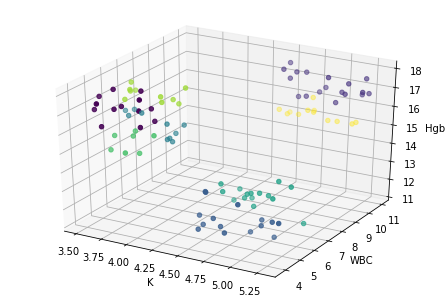

In [100]:
def make_chart (chart_data, y_pred, labels):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.scatter(chart_data[:,0], chart_data[:,1], chart_data[:,2], c=y_pred)

make_chart(EMR3d1, y_pred_KMeans1, variables1)

## Challenge 210
Implement  Lloyd's Algorithm for solving the K-Means problem, as shown in class.
By examining the WCSS, choose a proper threshold to determine algorithm convergence.

Compare your results to the _sklearn_ version - what can affect any differences you might've got?

In [101]:
# Add your code for Challenge 210 after this line, and keep it in this cell.

# Implement K-Means (X being the data)

from collections import defaultdict
from scipy.spatial import distance_matrix

class K_Means():

    def __init__(self, k, wcss_thresh=0, max_itr=1000):
        self.k = k
        self.wcss_thresh = wcss_thresh
        self.centers = None
        self.wcss = None
        self.max_itr = max_itr

    def fit(self, X):

        np.random.seed(4)

        wcss = np.inf

        centers = np.random.uniform(low=X.min(axis=0), high=X.max(axis=0), size=(self.k, X.shape[1]))

        count = 0

        while wcss > self.wcss_thresh:

            labels = np.argmin(distance_matrix(X, centers), axis=1)
            X_mapping = zip(X, labels)

            updated_centers = defaultdict(list)
            for sample in X_mapping:
                updated_centers[sample[1]].append(sample[0])

            new_centers = dict((k, np.vstack(v).mean(axis=0)) for k, v in updated_centers.items())

            updated_wcss = np.sum(list(dict((k, np.vstack(v).var(axis=0)) for k, v in updated_centers.items()).values()))

            centers = np.vstack(new_centers.values())
            count += 1

            if count >= self.max_itr or wcss == updated_wcss:
                break
            else:
                wcss = updated_wcss

        self.centers = centers
        self.wcss = wcss

    def predict(self, X):

        centers = self.centers
        prediction = np.argmin(distance_matrix(X, centers), axis=1)

        return prediction

/home/uri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


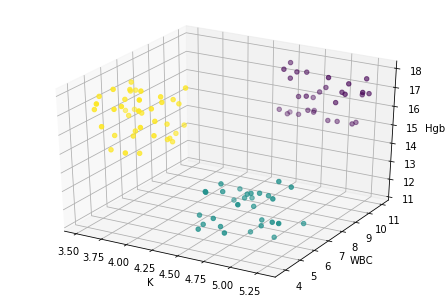

In [102]:
clf = K_Means(3)
clf.fit(EMR3d1)
make_chart(EMR3d1, clf.predict(EMR3d1), variables1)

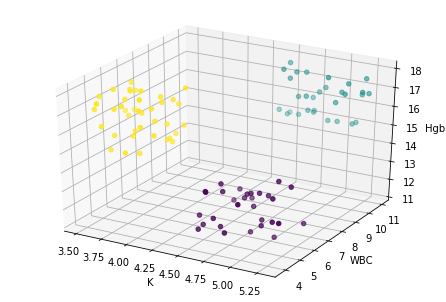

In [103]:
# sklearn kmeans with 3 means
clf = KMeans_sklearn(3)
clf.fit(EMR3d1)
y_pred_KMeans1 = clf.predict(EMR3d1)
make_chart(EMR3d1, y_pred_KMeans1, variables1)

### Comparison of our implementation to sklearn implementation
Compared to sklearn k-means with 3 means, it seems that our implementation reaches an identical clustering result on this data.

## Challenge 211

Humans can clearly spot 3 clusters, however, for machines it's much harder to "learn" that. In the above implementation, K-Means was given the value of 5 as K.
Develop a **generic** mechanism for finding the most reasonable number of clusters by:
1. Iterating K over a reasonable range, which should be derived from the number of points
2. Choose a proper K based on the heuristics learned in class
3. Showing the final clusters in a 3D chart

/home/uri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/uri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/uri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/uri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: FutureWarning: arrays to stack must be passed as a "sequence" 

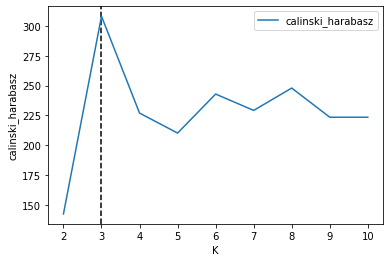

In [104]:
# Add your code for Challenge 211 after this line, and keep it in this cell.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score 

fig, ax = plt.subplots(1, 1)

results_list = []

k_values = np.sqrt(len(EMR3d1))
for k in range(1,int(k_values)):
    clf = K_Means(k+1)
    clf.fit(EMR3d1)
    predictions = clf.predict(EMR3d1)
    results_list.append({'K':k+1 ,'calinski_harabasz': calinski_harabasz_score(EMR3d1, predictions)})


results_df = pd.DataFrame(results_list)
optimal_k = results_df['K'][results_df['calinski_harabasz'].idxmax()]
plt.axvline(x=3,linestyle='--',color='black')
plt.ylabel('calinski_harabasz')
results_df.set_index('K').plot(ax=ax);



The optimal value of k is 3, reaching the maximum Calinski Harabasz score.

### Silhouette analysis

Use graphic visualization of the Silhouette score to support your above answer:

/home/uri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


For n_clusters = 3 The average silhouette_score is : 0.644343998493909


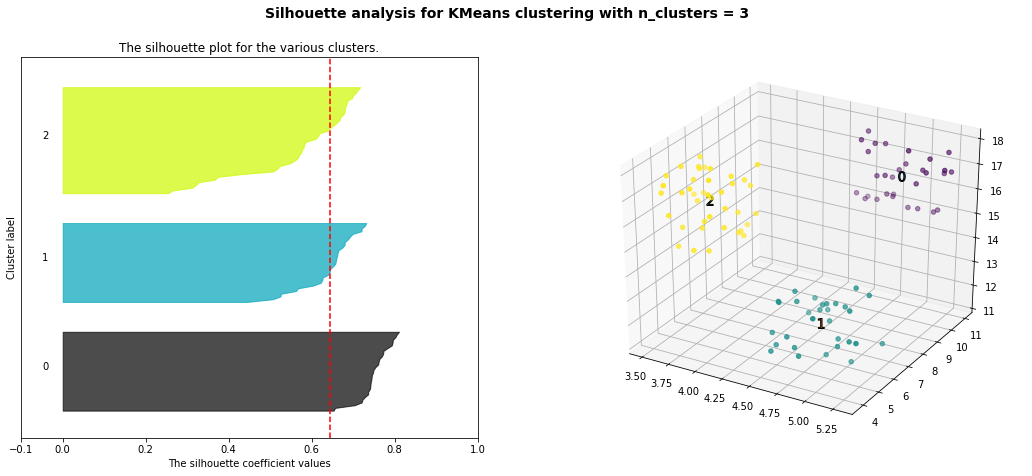

In [105]:
# Add your code for the Sillhouette graphic analysis
# You can use scikit-learn Sillhouette page as a reference

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

def plot_Silhouette(model,X, num_clusters):
    
    fig = plt.figure()
    fig.set_size_inches(18, 7)
    
    ax1 = fig.add_subplot(1, 2, 1)
    
    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(X) + (num_clusters + 1) * 10])

    clusterer = model(num_clusters)
    clusterer.fit(X)
    cluster_labels = clusterer.predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", num_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(num_clusters):

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / num_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    
    for i, c in enumerate(clusterer.centers):
        ax2.scatter(c[0], c[1], c[2], marker='$%d$' % i, alpha=1,
                    s=100, edgecolor='k')
    
    
    ax2.scatter(X[:,0], X[:,1], X[:,2], c=cluster_labels)


    plt.suptitle(("Silhouette analysis for KMeans clustering "
                  "with n_clusters = %d" % num_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


plot_Silhouette(K_Means, EMR3d1, 3)

In [106]:
silhouette_score(EMR3d1, clf.predict(EMR3d1))

0.4046586202441057

#### From this section on - please use the sklearn Kmeans

## Part 2: Mixture Models Clustering

### Use K-Means to create clusters according to variables of both uniform and Gaussian distributions

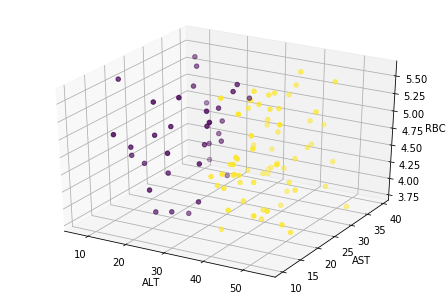

In [107]:
# Retrieve the ALT, AST and RBC column values from the dataset to cluster
variables2 = ["ALT","AST","RBC"]
EMR3d2 = sheet1.loc[:, variables2].values
clf = KMeans(2)
clf.fit(EMR3d2)
# Run the K-Means algorithm
# NOTICE, this time, we know that the correct number of clusters is 2
y_pred_KMeans2 = clf.predict(EMR3d2) # YOUR CODE HERE

# Make a 3D chart
make_chart(EMR3d2, y_pred_KMeans2, variables2)
# variables1+variables2

## Challenge 212
Scientists have found that in this population of patients, RBC distribution is uniform, ALT distribution is a Gaussian and AST distribution is a mixture of two Gaussians. Clearly, even by giving K-Means the correct K, the algorithm got to the wrong conclusion. This separation is "technically" correct, but lacks some underlying understanding of the natural phenomena.

What is the "problem" with this seperation?

# Your answer here
In the model above, we tried clustering our data using K-Means with 3 features - the distributions of these features are uniform, gaussian, and a mixture of 2 gaussians. The uniform feature will give an even spread of the data to all parts of it's axis and will not contribute to the partitioning of it. The gaussian feature will create a higher probability around one part of the space and lower probabilities when being further away from it, this will also not contribute to partitioning the space to 2. Only the feature that is distributed as a mixture of 2 gaussians will have 2 different dense centers along it's axis and will clearly seperate the data into 2 parts.

In order to exploit the Gaussian characteristic of the AST
1. Find the 2 componenets that comprise the AST feature by applying the GMM algorith with the proper number of components.
2. Assume that the clusters above are correct for the entire dataset (including the other features).
3. Show the final clusters (of EMR3d2) in a 3D chart

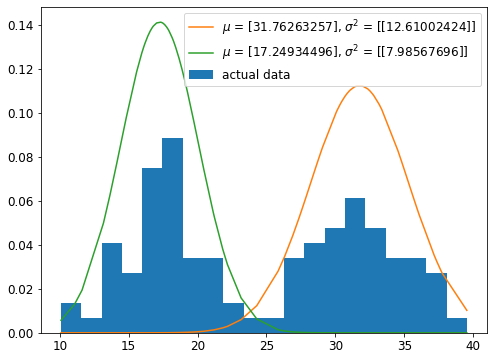

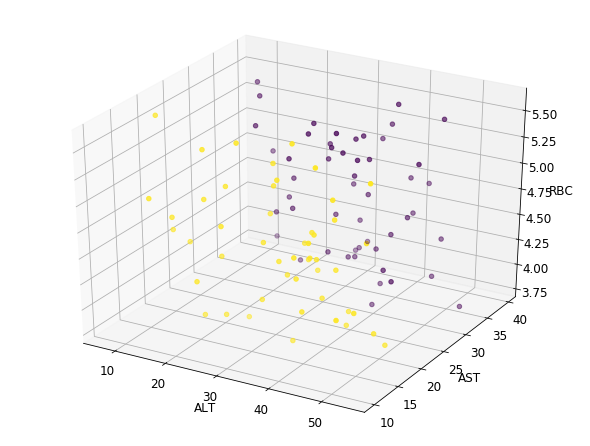

In [108]:
# Add your code for Challenge 212 after this line, and keep it in this cell.
from scipy.stats import norm, multivariate_normal

from sklearn.mixture import GaussianMixture

# Fit and predict GMM only on AST variable
ast = np.expand_dims(EMR3d2[:,1],1)
clf = GaussianMixture(2)
clf.fit(ast)

# Plot the 2 Gaussians received from model
x = np.sort(ast,axis=0)
plt.rcParams['figure.figsize'] = 8, 6 
plt.rcParams['font.size'] = 12
plt.hist(ast, bins=20, density=True, label="actual data")

for m, v in zip(clf.means_, clf.covariances_):
    y = norm(m, np.sqrt(v)).pdf(x)
    plt.plot(x, y, label = '$\mu$ = {}, $\sigma^2$ = {}'.format(m, v))
    plt.legend()

plt.show()

# Plot classification results
make_chart(EMR3d2, clf.predict(ast), variables2)

What is the difference between the two clustering results above?

Which one, given the domain knowledge provided to you, makes more sense?

### Answer
* By observing the visualisation of the first model, Kmeans using all 3 features, it seems that the partitioning of the data into 2 is done mainly along the `ALT` axis. With the GMM model, the partitioning into 2 is made along the `AST` axis.
* Given the domain knowledge, it makes more sense that the data will be clustered into 2 using a feature distributed as a mixture of 2 gaussians, rather than a feature which is distributed as 1 gaussian, hence the 2nd model is preffered.





# Good Luck!

